# Logistic regression using `statsmodels`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

Read in the British Crime Survey 2007-2008 dataset.

In [2]:
bcs = pd.read_csv('datasets/bcs.csv')

In [3]:
bcs.head()

,case_id,sex,age,marital_status,ethnic_origin,education,paid_work_last_wk,years_in_area,same_address_last_year,tenure,...,worry_rape,worry_assault,worry_insult,worry_racism,crime_change_two_yrs,personal_crime,property_crime,antisocial_behaviour,nuisance_neighbours,victim_last_yr
0,61302140,F,36.0,Married,White,None,True,"[10, 20)",NaN,Buying with mortgage/loan,...,Not very worried,Not very worried,Fairly worried,Not very worried,A little more crime,NaN,NaN,1.117700,2.212788,False
1,61384060,M,44.0,Separated,White,Apprenticeship or A/AS Level,True,"[0, 1)",False,Rent,...,Not at all worried,Not very worried,Not very worried,Not very worried,NaN,-0.389274,2.139811,1.791787,-1.024336,False
2,63684260,M,43.0,Married,White,O Level / GCSE,True,"[2, 3)",NaN,Buying with mortgage/loan,...,Not at all worried,Not very worried,Not very worried,Not very worried,NaN,-0.320777,0.506092,NaN,NaN,True
3,63790220,F,27.0,Single,Black or Black British,Apprenticeship or A/AS Level,True,"[0, 1)",False,Rent,...,Fairly worried,Fairly worried,Not very worried,Not very worried,NaN,0.464605,1.602307,0.462970,0.822929,True
4,63843180,M,38.0,Married,White,Degree or Diploma,True,"[10, 20)",NaN,Buying with mortgage/loan,...,Not at all worried,Not very worried,Not very worried,Not very worried,A lot more crime,-0.117556,-0.657555,0.137419,-0.780199,True


Define predictors and response.

In [4]:
predictors = ['sex', 'age', 'safety_walk_night']
response = 'victim_last_yr'
all_vars = predictors + [response]

Remove missing values.

In [5]:
bcs.dropna(subset=all_vars, inplace=True)

## EDA

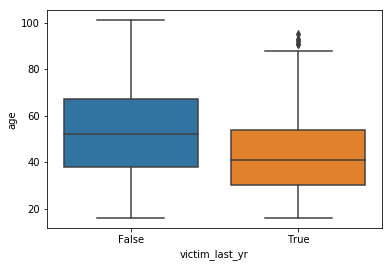

In [6]:
sns.boxplot(x='victim_last_yr', y='age', data=bcs)

## Odds and odds ratios

Probability of having experienced crime by sex:

In [10]:
p_men = bcs[bcs['sex'] == 'M']['victim_last_yr'].mean()
p_women = bcs[bcs['sex'] == 'F']['victim_last_yr'].mean()

In [11]:
p_men

0.20366868381240544

In [12]:
p_women

0.20199304017715913

Corresponding odds:

In [13]:
odds_men = p_men / (1 - p_men)
odds_women = p_women / (1 - p_women)

In [14]:
odds_men

0.25575872714319636

In [15]:
odds_women

0.25312190287413283

Alternatively:

In [16]:
odds_men = bcs[bcs['sex'] == 'M']['victim_last_yr'].sum() / (~bcs[bcs['sex'] == 'M']['victim_last_yr']).sum()
odds_women = bcs[bcs['sex'] == 'F']['victim_last_yr'].sum() / (~bcs[bcs['sex'] == 'F']['victim_last_yr']).sum()

In [17]:
odds_men

0.25575872714319636

In [18]:
odds_women

0.25312190287413283

Odds ratio of a woman having experienced crime (compared to a man):

In [19]:
odds_women / odds_men

0.9896901884892976

## Logistic regression

Modelling the probability of having experienced crime by sex.

*Note*: no intercept means there is no reference category.

In [20]:
bcs['victim_last_yr'] = bcs['victim_last_yr'].astype(int)  # Recode as 0/1
model1 = smf.logit('victim_last_yr ~ -1 + sex', data=bcs).fit()

Optimization terminated successfully.
         Current function value: 0.504198
         Iterations 5


In [21]:
bcs['victim_last_yr'].unique()

array([0, 1], dtype=int64)

In [22]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         victim_last_yr   No. Observations:                11610
Model:                          Logit   Df Residuals:                    11608
Method:                           MLE   Df Model:                            1
Date:                Fri, 19 Apr 2019   Pseudo R-squ.:               4.272e-06
Time:                        15:37:03   Log-Likelihood:                -5853.7
converged:                       True   LL-Null:                       -5853.8
                                        LLR p-value:                    0.8230
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex[F]        -1.3739      0.031    -43.858      0.000      -1.435      -1.312
sex[M]        -1.3635      0.034    -39.932      0.000      -1.430      -1.297
==============================================================================
"""

In [23]:
model1.params

sex[F]   -1.373884
sex[M]   -1.363521
dtype: float64

Taking the exponential of the regression coefficients returns the odds.

In [24]:
np.exp(model1.params)

sex[F]    0.253122
sex[M]    0.255759
dtype: float64

In [25]:
odds_men

0.25575872714319636

In [26]:
odds_women

0.25312190287413283

Including the intercept means one category (`sex` = 'M') acts as reference.

In [27]:
model2 = smf.logit("victim_last_yr ~ C(sex, Treatment(reference='M'))", data=bcs).fit()

Optimization terminated successfully.
         Current function value: 0.504198
         Iterations 5


In [28]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         victim_last_yr   No. Observations:                11610
Model:                          Logit   Df Residuals:                    11608
Method:                           MLE   Df Model:                            1
Date:                Fri, 19 Apr 2019   Pseudo R-squ.:               4.272e-06
Time:                        15:38:30   Log-Likelihood:                -5853.7
converged:                       True   LL-Null:                       -5853.8
                                        LLR p-value:                    0.8230
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -1.3635      0.034    -39.932      0.000      -1.430      -1.297
C(sex, Treatment(reference='M'))[T.F]    -0.0104      0.046     -0.224      0.823      -0.101       0.080
=========================================================================================================
"""

Taking the exponential of the regression coefficients returns the odds of the reference category, and the odds ratio of the outcome in the non-reference category.

In [29]:
np.exp(model2.params)

Intercept                                0.255759
C(sex, Treatment(reference='M'))[T.F]    0.989690
dtype: float64

In [30]:
odds_men

0.25575872714319636

In [31]:
odds_women / odds_men

0.9896901884892976

The odds in the non-reference category can be computed as the odds in the reference category (i.e. the intercept) multiplied by the odds ratio in the non-reference category (i.e. the regression coefficient).

In [32]:
np.prod(np.exp(model2.params))

0.2531219028741328

In [33]:
odds_women

0.25312190287413283

Let's try including more variables.

In [34]:
model3 = smf.logit(
    "victim_last_yr ~ C(sex, Treatment(reference='M')) + age + C(safety_walk_night, Treatment(reference='Very safe'))",
    data=bcs
).fit()

Optimization terminated successfully.
         Current function value: 0.478037
         Iterations 6


In [35]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         victim_last_yr   No. Observations:                11610
Model:                          Logit   Df Residuals:                    11604
Method:                           MLE   Df Model:                            5
Date:                Fri, 19 Apr 2019   Pseudo R-squ.:                 0.05189
Time:                        15:38:45   Log-Likelihood:                -5550.0
converged:                       True   LL-Null:                       -5853.8
                                        LLR p-value:                4.859e-129
==========================================================================================================================================
                                                                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                 -0.1315      0.079     -1.666      0.096      -0.286       0.023
C(sex, Treatment(reference='M'))[T.F]                                     -0.1883      0.051     -3.704      0.000      -0.288      -0.089
C(safety_walk_night, Treatment(reference='Very safe'))[T.A bit unsafe]     0.6191      0.072      8.657      0.000       0.479       0.759
C(safety_walk_night, Treatment(reference='Very safe'))[T.Fairly safe]      0.2184      0.063      3.456      0.001       0.095       0.342
C(safety_walk_night, Treatment(reference='Very safe'))[T.Very unsafe]      0.7749      0.089      8.680      0.000       0.600       0.950
age                                                                       -0.0308      0.001    -22.432      0.000      -0.033      -0.028
==========================================================================================================================================
"""

In [36]:
np.exp(model3.params)

Intercept                                                                 0.876819
C(sex, Treatment(reference='M'))[T.F]                                     0.828330
C(safety_walk_night, Treatment(reference='Very safe'))[T.A bit unsafe]    1.857319
C(safety_walk_night, Treatment(reference='Very safe'))[T.Fairly safe]     1.244052
C(safety_walk_night, Treatment(reference='Very safe'))[T.Very unsafe]     2.170337
age                                                                       0.969700
dtype: float64

In [37]:
np.exp(model3.conf_int())

,0,1
Intercept,0.751161,1.023499
"C(sex, Treatment(reference='M'))[T.F]",0.749761,0.915132
"C(safety_walk_night, Treatment(reference='Very safe'))[T.A bit unsafe]",1.614393,2.136799
"C(safety_walk_night, Treatment(reference='Very safe'))[T.Fairly safe]",1.099151,1.408054
"C(safety_walk_night, Treatment(reference='Very safe'))[T.Very unsafe]",1.821952,2.585338
age,0.967096,0.972310


In [38]:
model3.pvalues

Intercept                                                                  9.578223e-02
C(sex, Treatment(reference='M'))[T.F]                                      2.120706e-04
C(safety_walk_night, Treatment(reference='Very safe'))[T.A bit unsafe]     4.847630e-18
C(safety_walk_night, Treatment(reference='Very safe'))[T.Fairly safe]      5.477788e-04
C(safety_walk_night, Treatment(reference='Very safe'))[T.Very unsafe]      3.964205e-18
age                                                                       1.918834e-111
dtype: float64